In [1]:
#%% 
"""
Model: Multiclass Logistic Regression (Classficatio Model)  
@: paing_hein_soe
LinkedIn: https://www.linkedin.com/in/paing-hein-soe/
 
Final Step - Model Trainig 

"""
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from scipy import optimize

pixel_width = 50
pixel_height = 50

image_categories = ["Wind Plant", "Solar Farm", "Thermal Plant"]
folder_path_parent="D:\ML_Archived\GoogleImage_LogReg"
folder_name_items = image_categories

output_folders = [folder_path_parent + "\\" + item + "_resize" for item in folder_name_items]
target_labels = {item + "_resize": idx for idx, item in enumerate(folder_name_items)}

In [2]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [3]:
def costFunction(theta,X,y,Lambda):
    m = len(y)
    J = 0
    h = sigmoid(X@theta)
    epsilon = 1e-15
    J = 1/m*(-y.T@np.log(h+epsilon)-(1-y).T@np.log(1-h+epsilon))+Lambda/(2*m)*np.sum((theta[1:])**2)
    return J

In [4]:
def gradient(theta,X,y,Lambda):
    m = len(y)
    grad = np.zeros(theta.shape)
    h = sigmoid(X@theta)
    grad[0] = 1/m*(X[:,0].reshape(1,m)@(h-y))
    grad[1:] = 1/m*(X[:,1:].T@(h-y))+Lambda/m*theta[1:]
    return grad

In [5]:
def oneVsAll(X,y,nLabels,Lambda):
    m,n = X.shape
    all_theta = np.zeros((nLabels,n+1))
    X = np.concatenate((np.ones((m,1)), X),axis=1) #Add ones bias
    #theta_ini = np.zeros((n+1,1)) #np.random.randint(0,1,(n+1,1))
    theta_ini=np.random.rand(n + 1, 1) * 1e-3
    for k in np.arange(0,nLabels):
        #theta_opt =  optimize.minimize(costFunction, theta_ini,(X,y,Lambda), method='BFGS',jac=gradient)
        theta_opt =  optimize.fmin_cg(costFunction, theta_ini,fprime=gradient,args=(X,(y == k).astype(int),Lambda),maxiter=1000,gtol=1e-5)
        all_theta[k,:] = theta_opt # (theta.x).reshape(1,n+1)
    return all_theta

In [6]:
def displayData(X, nCols, pixel_width, pixel_height):
    """
    Display 2D data in a nice grid
    """
    # Compute rows, cols
    m, n = X.shape
    nRows = int(m / nCols)

    # Set up figure
    fig, axarr = plt.subplots(nRows, nCols, figsize=(nCols, nRows))

    # Reshape the image arrays and display them
    for i in range(nRows):
        for j in range(nCols):
            axarr[i, j].imshow(X[i * nCols + j].reshape(pixel_width, pixel_height, 3))
            #axarr[i, j].imshow(X[i * nCols + j].reshape(200, 200), cmap='gray')
            axarr[i, j].axis('off')

    plt.show()

In [7]:
def predictOneVsAll(all_theta, X):
    m, n = X.shape
    NLabels, o = all_theta.shape

    # You need to return the following variables correctly 
    p = np.zeros((m))

    # Add ones to the X data matrix
    X = np.concatenate((np.ones((m, 1)), X), axis=1) # Add Ones Bias into X Matrix
    probabilities = sigmoid(X @ all_theta.T)
    # Predict the class with the highest probability for each example
    p = np.argmax(probabilities, axis=1) #+ 1  # Adjust for 1-based indexing of class labels
    return p


In [8]:
#%%
# Initialize lists to store features and labels
features = []
labels = []

# Iterate over each output folder
for folder_path in output_folders:
    # Get the label for the current folder
    label = target_labels[os.path.basename(folder_path)]

    # Iterate over each image in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            # Open the image
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)

            # Convert the image to RGB mode
            img = img.convert('RGB')

            # Convert the image to numpy array
            img_array = np.array(img)
            
            # Compute mean values for each color channel
            mean_values = np.mean(img_array, axis=(0, 1))  
            
            # Compute standard deviations for each color channel
            std_values = np.std(img_array, axis=(0, 1))    

            # Concatenate mean_values, std_values, and img_array
            # and flatten the resulting array into a 1D array
            img_features = np.concatenate((mean_values, std_values, img_array.flatten()))

            # Append the flattened image array and label to the lists
            features.append(img_features)
            labels.append(label)

#%%

In [9]:
# Convert the lists to numpy arrays
X = np.array(features)
y = np.array(labels)

# Print the shape of the feature matrix and target array
print("Shape of feature matrix:", X.shape)
print("Shape of target array:", y.shape)

m, n = X.shape
print(y)
print(X)

Shape of feature matrix: (222, 7506)
Shape of target array: (222,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[138.7692 115.6516  77.2652 ...  18.      23.       3.    ]
 [137.27   127.2984 115.7928 ... 157.     113.      76.    ]
 [ 87.4944 100.3212 105.6028 ...  65.      63.      42.    ]
 ...
 [ 34.9424  51.214   63.952  ...  51.      48.      39.    ]
 [107.4556 109.1128 106.4556 ...  49.      51.      38.    ]
 [ 76.8268  98.4352 153.606  ...  88.      88.      38.    ]]


[[211. 212. 214. ... 252. 254. 253.]
 [133. 156. 190. ... 107.  95.  55.]
 [102. 135. 180. ...  73.  93. 128.]
 ...
 [ 47. 105. 239. ...  88.  88.  38.]
 [203. 226. 234. ... 158. 150. 147.]
 [202. 208. 222. ... 113. 106.  62.]]
(100, 7500)


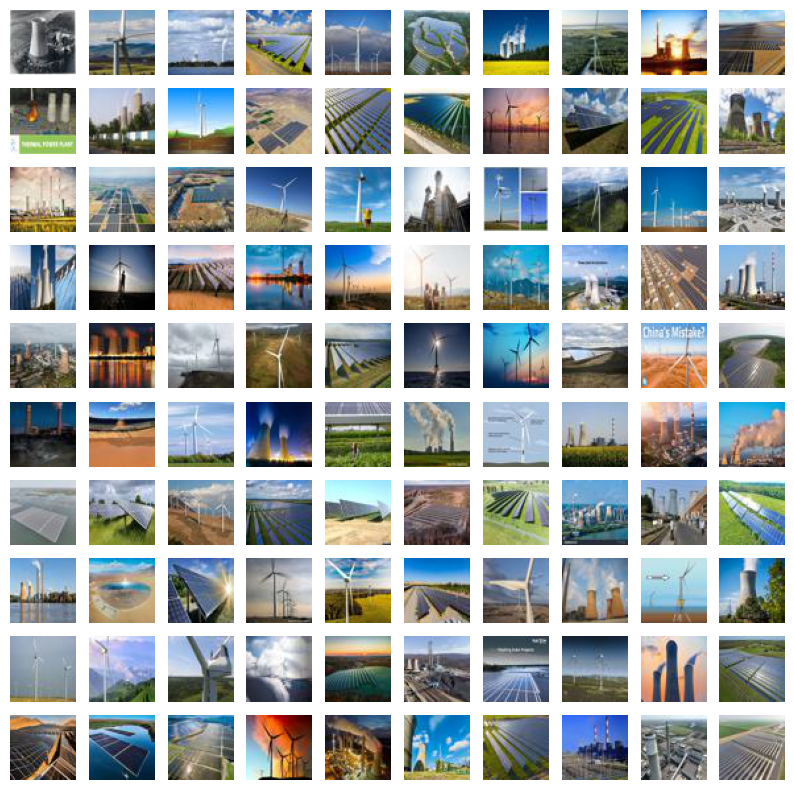

In [10]:
#%%

# randomly select 100 data points
randIndex = np.random.permutation(m)
sel = X[randIndex[0:100],6:] #first sxi featurs are not color pixels
# Normalize image data to the range [0, 1]
sel_normalized = sel / 255.0  # Assuming sel is your image data

print(sel)
print(sel.shape)
displayData(sel_normalized,10,pixel_width, pixel_height)

In [11]:
#%% Sample Test for J and grad
theta_t = np.array([-2, -1, 1, 2])
X_t = np.concatenate((np.ones((5,1)),np.reshape(np.arange(1,16),(5,3),order='F')/10),axis=1)
y_t = np.array([1,0,1,0,1])
Lambda_t = 3
J = costFunction(theta_t, X_t, y_t, Lambda_t)
grad = gradient(theta_t, X_t, y_t, Lambda_t)
print(J)
print(grad)
#%%

2.5348193961097416
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [12]:
#%% Split Training and Test Data
from sklearn.model_selection import train_test_split

# Assuming you have X and y arrays containing your features and labels
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (177, 7506)
Shape of X_test: (45, 7506)
Shape of y_train: (177,)
Shape of y_test: (45,)


In [13]:
#%% All_theta
#nLabels = 3
nLabels = len(image_categories)
Lambda = 0.01
all_theta = oneVsAll(X_train, y_train, nLabels, Lambda)
print(all_theta)

C:\Users\paing\AppData\Local\Temp\ipykernel_5460\3593790199.py:2: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))


Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 246
         Function evaluations: 556
         Gradient evaluations: 556
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 137
         Function evaluations: 328
         Gradient evaluations: 328
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 189
         Function evaluations: 412
         Gradient evaluations: 412
[[ 2.50166390e-04  8.69050635e-05 -3.88050536e-04 ...  1.95682642e-03
   7.40615295e-04  1.40563791e-03]
 [ 2.74613553e-04  1.07562736e-04 -4.14058779e-04 ...  6.56726621e-04
   2.39704839e-04  9.51699721e-05]
 [ 2.43531427e-04  1.70974520e-04 -6.13339976e-04 ... -1.65865131e-03
  -1.47431514e-03 -6.49602086e-04]]


In [14]:
#%% Only Testing
all_theta[1,:]

array([ 2.74613553e-04,  1.07562736e-04, -4.14058779e-04, ...,
        6.56726621e-04,  2.39704839e-04,  9.51699721e-05])

In [15]:
# Only Testing
X_trainCopy= X_train
m, n = X_trainCopy.shape
NLabels, o = all_theta.shape

# Add ones to the X data matrix
X_Copy = np.concatenate((np.ones((m, 1)), X_trainCopy), axis=1)
probabilities = sigmoid(X_Copy @ all_theta.T)
print(probabilities.shape)

p = np.argmax(probabilities, axis=1) #+ 1  # Adjust for 1-based indexing of class labe
p
probabilities
sigmoid(X_Copy@all_theta[2,:])

(177, 3)


array([1.50886762e-07, 2.32962497e-11, 6.10425388e-08, 1.31011675e-14,
       8.84114195e-08, 4.63686174e-08, 2.00325390e-08, 3.17565426e-08,
       4.04652308e-08, 7.43151571e-09, 9.99999047e-01, 9.99999645e-01,
       9.99999493e-01, 3.14013393e-08, 2.63065215e-07, 6.64573931e-07,
       9.99999999e-01, 9.99999976e-01, 9.99999336e-01, 1.67096954e-06,
       2.56689115e-07, 3.42507064e-07, 9.99999566e-01, 8.18161872e-10,
       2.89087663e-08, 2.90600281e-09, 9.99999783e-01, 9.99999209e-01,
       6.27154040e-08, 2.43865785e-27, 1.56346976e-07, 4.05156975e-07,
       9.30212172e-08, 5.62363904e-07, 9.99999767e-01, 3.33385760e-08,
       9.99999817e-01, 4.75810175e-07, 9.99999677e-01, 9.99999689e-01,
       6.56837937e-09, 8.56831887e-07, 4.02613470e-11, 9.87378004e-23,
       9.99999628e-01, 1.53191874e-08, 5.13062770e-08, 9.99999796e-01,
       2.67625905e-07, 4.65148686e-08, 4.22830593e-07, 1.55917235e-09,
       4.02666114e-08, 8.69390105e-11, 9.99999882e-01, 4.90664938e-08,
      

In [16]:
print(all_theta.shape)

(3, 7507)


In [17]:
#%%
p = predictOneVsAll(all_theta, X_train)
print(p)
print(y_train)
accuracy = np.mean(1*(p==y_train))*100
print('\nTraining Set Accuracy: {:.2f} %\n'.format(accuracy))

[0 1 1 1 1 1 1 1 0 0 2 2 2 1 0 0 2 2 2 1 0 0 2 1 1 0 2 2 1 0 0 0 0 0 2 1 2
 0 2 2 1 0 1 1 2 0 1 2 1 0 0 1 0 1 2 1 1 1 1 1 0 2 0 0 2 2 0 0 2 2 0 0 1 2
 1 0 0 1 2 2 2 1 0 0 1 2 2 0 2 0 0 1 0 1 0 2 2 1 0 2 0 1 2 0 1 1 0 1 0 1 2
 2 2 0 1 0 0 1 1 1 2 2 1 0 0 0 2 1 0 2 0 2 1 2 2 0 0 1 0 2 2 2 0 0 1 0 0 2
 2 2 2 1 0 2 2 0 0 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 1 0 1 2 1]
[0 1 1 1 1 1 1 1 0 0 2 2 2 1 0 0 2 2 2 1 0 0 2 1 1 0 2 2 1 0 0 0 0 0 2 1 2
 0 2 2 1 0 1 1 2 0 1 2 1 0 0 1 0 1 2 1 1 1 1 1 0 2 0 0 2 2 0 0 2 2 0 0 1 2
 1 0 0 1 2 2 2 1 0 0 1 2 2 0 2 0 0 1 0 1 0 2 2 1 0 2 0 1 2 0 1 1 0 1 0 1 2
 2 2 0 1 0 0 1 1 1 2 2 1 0 0 0 2 1 0 2 0 2 1 2 2 0 0 1 0 2 2 2 0 0 1 0 0 2
 2 2 2 1 0 2 2 0 0 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 1 0 1 2 1]

Training Set Accuracy: 100.00 %



In [18]:
#%%
p2 = predictOneVsAll(all_theta, X_test)
print(p2)
print(y_test)
accuracy2 = np.mean(1*(p2==y_test))*100
print('\Test Set Accuracy: {:.2f}\n'.format(accuracy2))

[1 0 2 0 2 2 0 0 2 0 1 0 1 1 0 0 1 1 0 0 1 0 0 2 0 1 2 2 1 2 0 1 0 1 1 1 1
 0 1 0 1 2 1 1 0]
[2 2 0 2 2 1 1 0 0 0 1 2 1 1 0 0 1 1 0 2 1 0 2 0 1 0 0 2 1 0 1 0 1 2 1 1 2
 2 1 1 1 1 2 1 1]
\Test Set Accuracy: 44.44



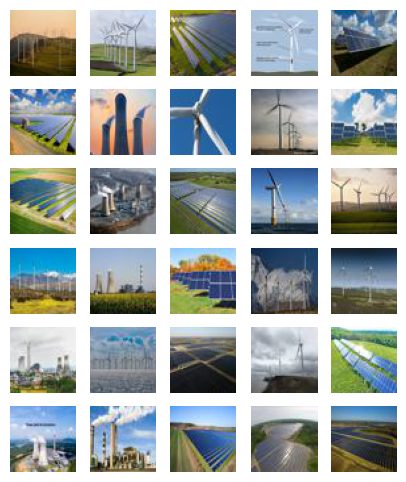

(30,)
[  0  34  86  30 122  94 170  23  67 104  81 176  93  36  10  63 169 108
  49   2 172  56 126  37 150 162 168 135  90 138]
177


In [19]:
#%%
sel = np.random.permutation(m)
n = 30
sel = sel[0:n]
X_sel = X[sel,6:]
X_sel_normalized = X_sel/255;
displayData(X_sel_normalized,5, pixel_width, pixel_height)
print(sel.shape)
print(sel)
print(m)

In [20]:
p = predictOneVsAll(all_theta, X)
# Stack p and y horizontally
stacked_data = np.column_stack((y, p))

# Convert stacked data to a Pandas DataFrame
df = pd.DataFrame(stacked_data, columns=['Target', 'Prediction'])

# Convert DataFrame values to integers
df = df.astype(int)

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(df)

     Target  Prediction
0         0           0
1         0           0
2         0           0
3         0           0
4         0           0
5         0           0
6         0           0
7         0           0
8         0           0
9         0           0
10        0           0
11        0           0
12        0           0
13        0           0
14        0           0
15        0           2
16        0           1
17        0           0
18        0           0
19        0           0
20        0           0
21        0           0
22        0           0
23        0           0
24        0           0
25        0           0
26        0           0
27        0           0
28        0           0
29        0           0
30        0           0
31        0           0
32        0           0
33        0           0
34        0           0
35        0           0
36        0           0
37        0           0
38        0           0
39        0           0
40        0     

In [21]:
y[sel]
print(y[sel].shape)
print(p[sel].shape)

# Stack p and y horizontally
stacked_data = np.column_stack((sel,y[sel], p[sel]))

# Convert stacked data to a Pandas DataFrame
df = pd.DataFrame(stacked_data, columns=['index','Target', 'Prediction'])

# Convert DataFrame values to integers
df = df.astype(int)

# Display the DataFrame
print(df)

(30,)
(30,)
    index  Target  Prediction
0       0       0           0
1      34       0           0
2      86       1           1
3      30       0           0
4     122       1           1
5      94       1           1
6     170       2           2
7      23       0           0
8      67       0           2
9     104       1           1
10     81       1           1
11    176       2           0
12     93       1           0
13     36       0           0
14     10       0           0
15     63       0           0
16    169       2           2
17    108       1           1
18     49       0           0
19      2       0           0
20    172       2           2
21     56       0           0
22    126       1           1
23     37       0           0
24    150       1           1
25    162       2           2
26    168       2           2
27    135       1           1
28     90       1           1
29    138       1           1


In [22]:
# Using sklearn - Model Training 

In [23]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [24]:
display("X_train Sample", X_train[:5,:], "Y_train Sample", y_train[:5])


'X_train Sample'

array([[143.6136, 158.3432, 185.3628, ...,  72.    , 115.    ,  36.    ],
       [129.8808, 164.3752, 132.3564, ...,  40.    ,  96.    , 189.    ],
       [100.9668, 109.1096, 125.43  , ...,  25.    ,  18.    ,  10.    ],
       [ 99.986 , 108.1132,  78.8628, ...,  58.    ,  50.    ,  29.    ],
       [100.5084, 128.2788, 166.822 , ...,  79.    ,  91.    , 131.    ]])

'Y_train Sample'

array([0, 1, 1, 1, 1])

In [25]:
# Generate synthetic dataset

# Initialize the Logistic Regression model
model = LogisticRegression()

X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]
print(X_train.shape)
print(y_train.shape)
# Train the model on the training set
model.fit(X_train, y_train)

(177, 7507)
(177,)


C:\Users\paing\anaconda3\envs\ML_owt\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.coef_
all_theta

array([[ 2.50166390e-04,  8.69050635e-05, -3.88050536e-04, ...,
         1.95682642e-03,  7.40615295e-04,  1.40563791e-03],
       [ 2.74613553e-04,  1.07562736e-04, -4.14058779e-04, ...,
         6.56726621e-04,  2.39704839e-04,  9.51699721e-05],
       [ 2.43531427e-04,  1.70974520e-04, -6.13339976e-04, ...,
        -1.65865131e-03, -1.47431514e-03, -6.49602086e-04]])

In [27]:
# Make predictions on the testing set
y_pred2 = model.predict(X_train)

# Evaluate the model
accuracy2 = accuracy_score(y_train, y_pred2)
classification_rep2 = classification_report(y_train, y_pred2)

print(f"Accuracy: {accuracy2}")
print("\nClassification Report:\n", classification_rep2)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        56

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



In [28]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.5111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.46      0.43        13
           1       0.71      0.75      0.73        20
           2       0.22      0.17      0.19        12

    accuracy                           0.51        45
   macro avg       0.45      0.46      0.45        45
weighted avg       0.49      0.51      0.50        45



(177, 7508)
(177,)
Training Accuracy: 1.00
Testing Accuracy: 0.47

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.46      0.40        13
           1       0.65      0.65      0.65        20
           2       0.25      0.17      0.20        12

    accuracy                           0.47        45
   macro avg       0.42      0.43      0.42        45
weighted avg       0.46      0.47      0.46        45

Training Predictions


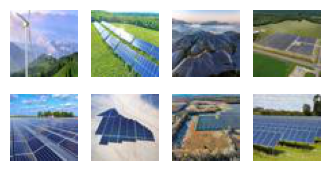

Image 1: Observation (y) = Wind Plant, Prediction = Wind Plant
Image 2: Observation (y) = Solar Farm, Prediction = Solar Farm
Image 3: Observation (y) = Solar Farm, Prediction = Solar Farm
Image 4: Observation (y) = Solar Farm, Prediction = Solar Farm
Image 5: Observation (y) = Solar Farm, Prediction = Solar Farm
Image 6: Observation (y) = Solar Farm, Prediction = Solar Farm
Image 7: Observation (y) = Solar Farm, Prediction = Solar Farm
Image 8: Observation (y) = Solar Farm, Prediction = Solar Farm
Testing Predictions


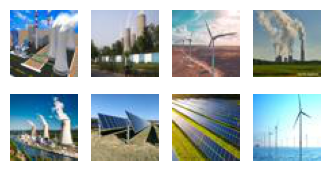

Image 1: Observation (y) = Thermal Plant, Prediction = Solar Farm
Image 2: Observation (y) = Thermal Plant, Prediction = Wind Plant
Image 3: Observation (y) = Wind Plant, Prediction = Thermal Plant
Image 4: Observation (y) = Thermal Plant, Prediction = Wind Plant
Image 5: Observation (y) = Thermal Plant, Prediction = Thermal Plant
Image 6: Observation (y) = Solar Farm, Prediction = Thermal Plant
Image 7: Observation (y) = Solar Farm, Prediction = Wind Plant
Image 8: Observation (y) = Wind Plant, Prediction = Wind Plant


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Class Labels
label_map = {v: k.replace("_resize", "") for k, v in target_labels.items()}

# Function to display images with predictions and actual observations
def display_predictions(X, y_true, y_pred, nCols, title):
    print(title)  # Display title in console
    predictions = [label_map[p] for p in y_pred[:nCols*2]]  # Get predicted labels
    observations = [label_map[o] for o in y_true[:nCols*2]]  # Get actual labels

    # Display images
    data_col_exclude = 6 + 2;
    displayData((X[:nCols*2, data_col_exclude:]/255 ).astype(np.float32), nCols, pixel_width, pixel_height)

    # Print actual and predicted labels
    for i, (obs, pred) in enumerate(zip(observations, predictions)):
        print(f"Image {i+1}: Observation (y) = {obs}, Prediction = {pred}")

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=5000)  # Ensure convergence

# Adding bias term to input features
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Print shapes
print(X_train.shape)
print(y_train.shape)

# Train the model
model.fit(X_train, y_train)

# Make predictions on training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print("\nTesting Classification Report:\n", classification_report(y_test, y_pred_test))

# Display images and predictions including observations (y)
display_predictions(X_train, y_train, y_pred_train, nCols=4, title="Training Predictions")
display_predictions(X_test, y_test, y_pred_test, nCols=4, title="Testing Predictions")


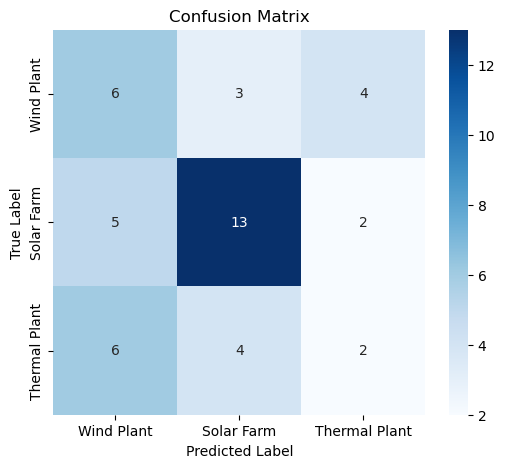

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot the heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
